### This is a simple example that is taken from the https://github.com/amazon-science/chronos-forecasting

In [2]:
import pandas as pd  # requires: pip install pandas
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cpu",  # use "cpu" for CPU inference and "mps" for Apple Silicon
    torch_dtype=torch.bfloat16,
)

df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")

# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
# forecast shape: [num_series, num_samples, prediction_length]
forecast = pipeline.predict(
    context=torch.tensor(df["#Passengers"]),
    prediction_length=12,
    num_samples=20,
)

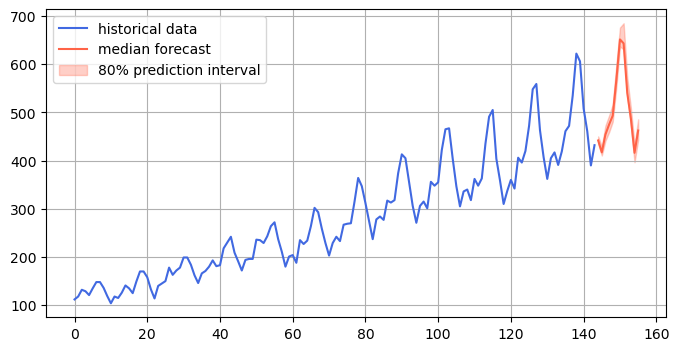

In [3]:
import matplotlib.pyplot as plt  # requires: pip install matplotlib
import numpy as np

forecast_index = range(len(df), len(df) + 12)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["#Passengers"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

If you want to run the same model on the work of Jablonka with his dataset (which is the same pilot plant as this work), run the followings:

In [12]:
import pickle

with open("../data/20210624_df_cleaned.pkl", "rb") as f:
    df = pickle.load(f)

# df is now your deserialized object
df.head()

,Carbon dioxide CO2,Ammonia NH3,2-Amino-2-methylpropanol C4H11NO,Piperazine C4H10N2,PI-2,TI-2,FI-2,PI-3,TI-3,CO2-3,...,TI-152,TI-212,FI-241,TI-241,TI-242,valve-position-12,TI-1213,delta_t,delta_t_2,FI-20/FI-23
2010-01-01 00:00:00,-1.420676,-4.635705,-71.459266,-25.230760,0.002735,0.031787,-0.433018,-0.007575,-0.574300,0.503081,...,0.725273,-0.976519,-48.852540,0.440787,2.050777,1.0,0.596841,-0.282931,0.311290,-2.237885
2010-01-01 00:02:00,-1.420671,-4.635430,-71.826853,-25.275212,0.002921,0.042870,0.996429,-0.007366,-0.591385,0.443656,...,0.729429,-1.005934,-49.442848,0.427070,2.057105,1.0,0.614650,-0.273446,0.357374,-2.245816
2010-01-01 00:04:00,-1.424862,-4.635134,-71.962995,-25.360660,0.002955,0.023703,-0.660804,-0.007393,-0.599158,0.409910,...,0.736212,-1.019141,-48.944777,0.401653,2.036986,1.0,0.614372,-0.314019,0.399942,-2.256491
2010-01-01 00:06:00,-1.426891,-4.634819,-71.904020,-25.359670,0.002962,0.021694,-0.801732,-0.007322,-0.602362,0.425389,...,0.760679,-1.018559,-49.608221,0.384035,2.022686,1.0,0.608359,-0.338972,0.392507,-2.239006
2010-01-01 00:08:00,-1.426502,-4.634486,-71.889791,-25.354137,0.002918,0.031136,-0.249248,-0.007279,-0.605148,0.510319,...,0.772925,-1.034731,-50.312833,0.386469,2.014085,1.0,0.592420,-0.280453,0.391119,-2.265812


In [13]:
forecast = pipeline.predict(
    context=torch.tensor(df["2-Amino-2-methylpropanol C4H11NO"][:-64]),
    prediction_length=64,
    num_samples=20,
)

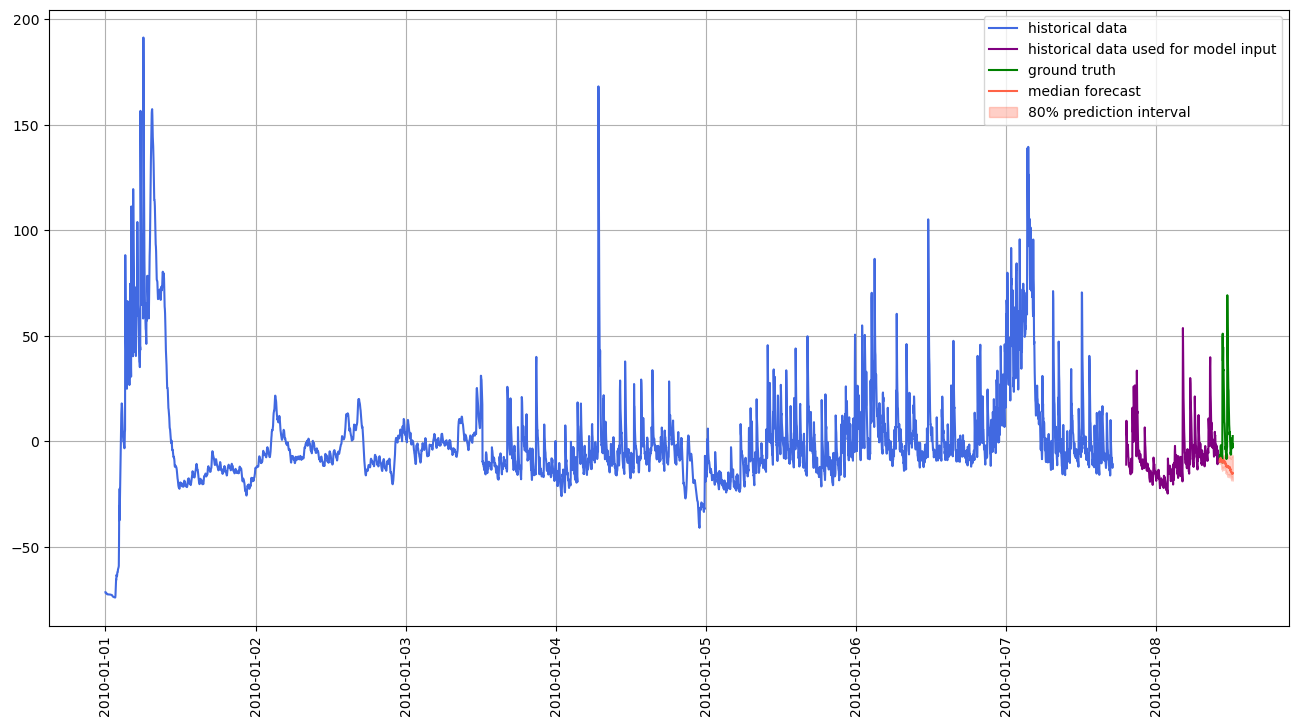

In [24]:
forecast_index = df.index[-64:]
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)


# Define the indices
total_length = len(df)
# Indices for each segment
initial_end = total_length - 512 - 64
input_start = total_length - 512
input_end = total_length - 64
ground_truth_start = total_length - 64

plt.figure(figsize=(16, 8))
plt.plot(df["2-Amino-2-methylpropanol C4H11NO"][:initial_end], color="royalblue", label="historical data")
plt.plot(df["2-Amino-2-methylpropanol C4H11NO"][input_start:input_end], color = 'purple', label="historical data used for model input")
plt.plot(df["2-Amino-2-methylpropanol C4H11NO"][ground_truth_start:], color = 'green', label="ground truth")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()